In [1]:
#  Copyright 2023 Google LLC
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      https://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.

# Apply to Lth Target

In [2]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ApplyGateToLthQubit`
A controlled SELECT operation for single-qubit gates.

$$
\mathrm{SELECT} = \sum_{l}|l \rangle \langle l| \otimes [G(l)]_l
$$

Where $G$ is a function that maps an index to a single-qubit gate.

This gate uses the unary iteration scheme to apply `nth_gate(selection)` to the
`selection`-th qubit of `target` all controlled by the `control` register.

#### Parameters
 - `selection_regs`: Indexing `select` signature of type Tuple[[`Register`](/reference/qualtran/Register.md), ...]. It also contains information about the iteration length of each selection register.
 - `nth_gate`: A function mapping the composite selection index to a single-qubit gate.
 - `control_regs`: Control signature for constructing a controlled version of the gate. 

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity](https://arxiv.org/abs/1805.03662). Babbush et. al. (2018). Section III.A. and Figure 7.


In [3]:
from qualtran.bloqs.multiplexers.apply_gate_to_lth_target import ApplyGateToLthQubit

### Example Instances

In [4]:
from qualtran import BoundedQUInt, Register

def _z_to_odd(n: int):
    if n % 2 == 1:
        return cirq.Z
    return cirq.I

apply_z_to_odd = ApplyGateToLthQubit(
    Register('selection', BoundedQUInt(3, 4)),
    nth_gate=_z_to_odd,
    control_regs=Signature.build(control=2),
)


#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([apply_z_to_odd],
           ['`apply_z_to_odd`'])

## Decomposition

In [6]:
import qualtran.cirq_interop.testing as cq_testing
from qualtran.cirq_interop.jupyter_tools import display_gate_and_compilation

g = cq_testing.GateHelper(
    apply_z_to_odd
)

display_gate_and_compilation(g)

### Call Graph

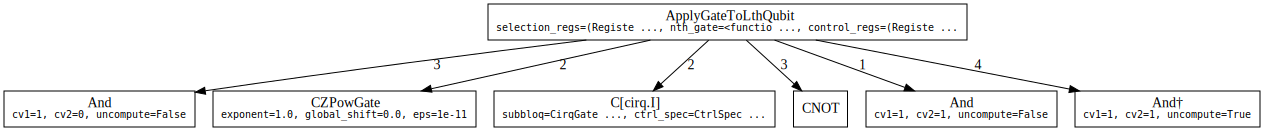

#### Counts totals:
 - `And(cv1=1, cv2=0, uncompute=False)`: 3
 - `And(cv1=1, cv2=1, uncompute=False)`: 1
 - `And(cv1=1, cv2=1, uncompute=True)`: 4
 - `CNOT()`: 3
 - `CZ`: 2
 - `C[I]`: 2

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
apply_z_to_odd_g, apply_z_to_odd_sigma = apply_z_to_odd.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(apply_z_to_odd_g)
show_counts_sigma(apply_z_to_odd_sigma)